<h2 style="color:red">Supervised machine learning algorithms</h2>

As we said in the previous session, supervised machine learning uses data that has labels. There are two categories of supervised machine learning: Regression and classification

<h3>Learning outcomes</h3>

At the end of this session the learner should be able to;

1. Explain the difference between the regression and classification machine learning algorithms
2. Train at least one regression and one classification algorithm
3. Visualize the result of the algorithm
4. Evaluate the performance of the trained machine learning algorithms using different metrics
5. Interprate and communicate the results of the machine learning algorithms

<h3>Regression</h3>

In regression, the idea is to predict a numerical variable like age, salary. We are going to look at two algorithms for regression i.e simple linear regression and multiple linear regression.

<h2>Linear Regression</h2>
Linear regression is used to model the relationship between a dependent variable (also known as the target or response variable) and one or more independent variables (also known as predictor variables or features). It’s a supervised learning technique widely employed for prediction and inference tasks.

<h2>Simple linear regression</h2>

In simple linear regression, we have one indepedent(predictor) variable and one dependent variable(outcome variable).

The formulae for simple linear regression is

    y=mx+c
Lets look at what each of the elements of the formulae mean:

x is the value of the indepedent variable. It is the variable we are going to use to predict the outcome variable.

m: is the gradient(Slope): The slope indicates the rate at which the outcome variable changes as the depedent variable changes.

c:Intercept-The intercept indicates the value of the depedent variable when the indepedent variable is equal to zero.

y:is the depedent(outcome) variable

Now that we have understood the formulae for linear regression, We are going to do an example of predicting someones weight based on their height. The indepedent variable in this case is the height and the depedent variable is the weight.

We are going to use the linear regression algorithm function that has been developed in the sklearn python library. The sklearn cointains other functions that we will be using to create other machine learning algorithms.

To start we will import the libraries that we are going use. Wa will need the pandas library for reading data and presenting our data in a tabular format. We will also need the numpy library for converting our data into a 2 dimensional arrays. The sklearn library contains the functions for creating various machine learning models in this case we are interested in linear models, so we will import that particular class of models. We also need to seperate our data into training and testing data for the purpose of evaluating our algorithm. In order to do that we will need the function for dividing our data into training and testing data called train_test_split. This function is also found in the sklearn library. Finaly we will need to draw some graphs about our data, to do that we will import the matplotlib library.

In [7]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


After importing the necessary library, we are going to read our data that contains the age and weight of children in Bungoma county. In order to do that we are going to create a variable that will store our data, we are calling the variable 'data'. Then we are going to use the function in the pandas library for reading the excel file called 'read_excel' because our file is in excel. The funcion 'read_excel' expects as an argument the path to where our file is located. In this case our file is located in the drive in a folder called engage dataset hat is inside another folder called, revised  Engage Data science materials.

**NOTE: Be sure to change the content in inside the quotation marks to indicate where your data is located**

In [8]:
#Reading data
data=pd.read_excel("child_data .xlsx")


After reading the data, we can view a few rows to just see how the data looks like using the head() function introduced earlier



In [10]:
data.head()

,Age (months),Sex,Mother's education,Area,Wealth index quintile,Child's weight (kilograms)
0,45,0,1,0,0,16.2
1,45,1,0,0,1,13.5
2,36,1,0,0,2,13.4
3,51,0,0,0,2,15.0
4,56,0,0,0,2,15.2


We can check to  see if the data coitained in our two columns cointains any missing values by using the isnull() function and the sum() function.

In [11]:
data.isnull().sum()

Age (months)                  0
Sex                           0
Mother's education            0
Area                          0
Wealth index quintile         0
Child's weight (kilograms)    0
dtype: int64

We can see that our dataset has null values with the weight column having 65 and the age column having 28. We can remove the null values from our dataset using the pandas dropna()function.

In [12]:
data.dropna(inplace=True)

In [13]:
data.shape


(768, 6)

In [14]:
data.isnull().sum()

Age (months)                  0
Sex                           0
Mother's education            0
Area                          0
Wealth index quintile         0
Child's weight (kilograms)    0
dtype: int64

Now we can see that our dataset has no null values. We can now go a head and use our data.

We can see from our data that there are three columns:index, Child's weight (kilograms), Age (months) and the columns  Child's weight (kilograms)and Age (months) contains numerical values.

We can also get a feel of how our two variables are related by creating a scatter plot as shown below. From the diagram we can see that our variables exibit a linear relationship.

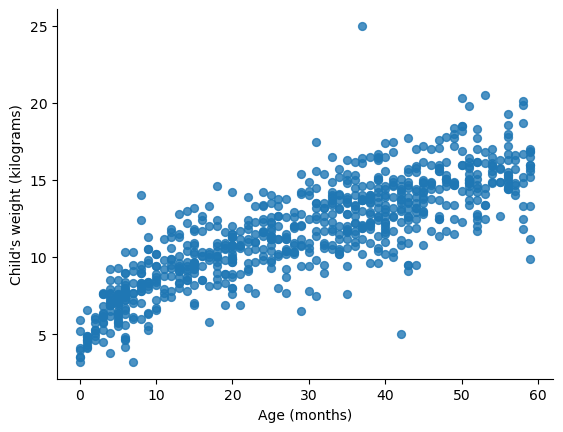

In [15]:
# Scatter plot
data.plot(kind='scatter', x="Age (months)", y="Child's weight (kilograms)", s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Before we use the data to train our algorithm, it is important also to be able to establish weather our data has some missing data. In order to do so we will use the isnull() function and culculate the sum of all the missing values for each columns using the sum() function as shown below.

In [16]:
#checking if there is missing data
data.isnull().sum()

Age (months)                  0
Sex                           0
Mother's education            0
Area                          0
Wealth index quintile         0
Child's weight (kilograms)    0
dtype: int64

We can see the sum for missing values is zero in all the columns. This means that our data has no missing values. Once we have established that our data is okay, we can now go ahead and extract our indepedent (x variable) and the depedent(y variable) from our dataset. In this case our x variable will be the column for height and the y variable will be the column for weight.

In [17]:
#Creating x and y values: X being the indepedent variable and y being the dependant variable

x=data[["Age (months)"]]
y=data[["Child's weight (kilograms)"]]

After creating our x and y values, we can now create the model using the function LiearRegression cointained in the linear_model class as shown below.

In [18]:
#creating the model
model=linear_model.LinearRegression()


In order to train our algorithm, we will need to first split our data into training and testing data using the train_test_split function we had imported as swown in the code below.

In [19]:
#splitting the data into 70% training and 30% testing
x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

After splitting the data we can check to just see the number of records in the test and train dataset using the shape attribute.

In [21]:
print(x_train.shape)
print(y_train.shape)

(537, 1)
(537, 1)


We can see that our training data has 559 rows and 1 column. The test data has 7500 rows and 1 column.

**Culculate the percentage using the hand and see if we have 70% training data and 30%test data**

Now that we split our data into training and testing data, we can now train the algorithm using the x_train and the y_train data using the function called fit as shown in the code below;

In [22]:
#training the model

model.fit(x_train,y_train)

LinearRegression()

Once the model is trained, we can now use it to predict the data it has not seen saved in the x_test variable using the predict() function.

In [25]:
y_pred=model.predict(x_test)

After getting the predicted values, we can compare it with the actual values saved in the y_test. We can do that by ploting the lines that show the predicted values and the actual values using the matplotlib library as shown below

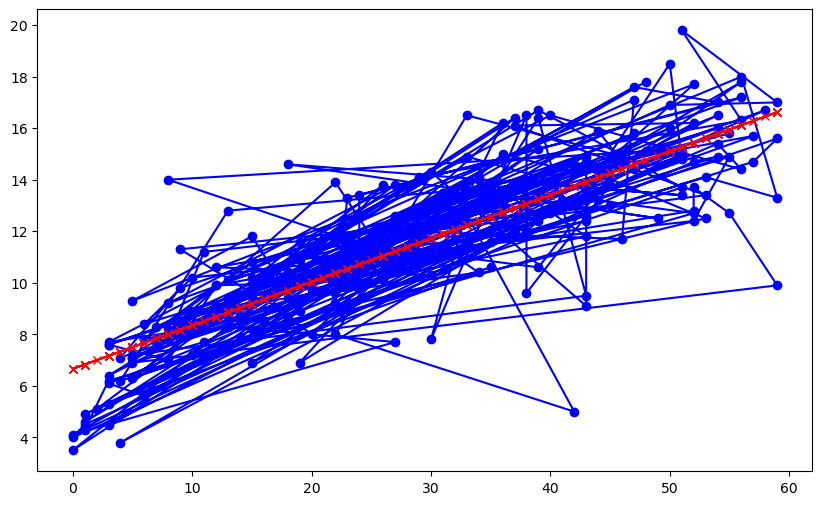

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='Actual Values', color='blue', marker='o')

# Plot predicted values
plt.plot(x_test, y_pred, label='Predicted Values', color='red', marker='x')


The red line indicates the predicted values while the blue lines indicate the actual values. As we can see from the graph it seems our model did not fit all the values correctily.

From the model, we can also get the value of the intercept and the value of the slop(coefficient)

The intercept from the model is 6.58567429 which means when the age is equal to 0 the weight is 6.58567429 kgs.

In [26]:
model.intercept_

array([6.6575953])

The coefficient means that if the height increases by 1 inch the weight increases by 3.089

In [27]:
model.coef_

array([[0.16890263]])

We can now use the created model to predict the weight of  of a new baby, lets say for a baby who is 5.5 months old. We will use the predict() function provided by sklearn as follows

In [28]:
predicted_weigtht= model.predict([[10]])
print(predicted_weigtht)

[[8.34662162]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


We can see from the value the predicted model displayed, a child who is 5.5 months old will approximetely weigh 7.4kgs. We can use this model to be able to estimate the weight a child should be having at certain age, major deviation from the predicted values might be an indication of oveweight or underweight.

<h2>Evaluating our created model</h2>

In order to know how well our model performs, we will have to test to see how well it predicts the data that it was not trained on.

There are several metrics that are used to evaluate a linear model. These are;

**Mean Absolute error(MAE):** It measures the  absolute differences between predicted and actual values without considering their direction. It ranges from zero to infinity. The lower the values the better

**Mean squared error (MSE):** It measures the average squared difference between the actual values and the predicted values. It ranges from zro to infinity.Higher values indicate a high error margin.

**R2-squared:** It is also known as the coefficient of determination. It measurers how well the indepedent variable predicts the depedent variable. It ranges from 0 to 1. Higher values indicates a better fit.

**Root Mean Squared Error (RMSE):**Measures the avarage difference between the actual and predicted values.

In this example we are going to evaluate the linear regression r_squared, mean absolute error, mean squared error. In order to do that we have to import the functions from skelarn and then use them to evaluate the performance of our algorithm as shown below.


In [29]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("Mean squared error")
print(mean_squared_error(y_test,y_pred))
print("R_squared")
print(r2_score(y_test,y_pred))
print("Mean absolute error")
print(mean_absolute_error(y_test,y_pred))

Mean squared error
3.76699923173311
R_squared
0.6901916485037674
Mean absolute error
1.4593651984532783


In [18]:
import joblib
joblib_file = "linear_regression_model2.joblib"
joblib.dump(model, joblib_file)

['linear_regression_model2.joblib']

**<h3>Model result interpretatition</h3>**

From the metrics result, we can see our model is okay but with a good fit as the r_squared is low at 0.68. This means that the our predictor variable weight only explains 68% of the variation in the in the childs weight. The other 32% variation is explained by other factors not included in our data. This means that age alone can predict the weight of a person but might need additional variables to improve the performance.

The mean absolute error of 1.43 shows that on average  the predictions made by your linear regression model differ from the actual values by approximately 1.43kgs. This means that if the actual weight of a person is of a child is 9 the model will predict it to be 10.43 or 7.57

The mean squared error of 3.42 shows that our algorithm squared error between the actual value and the predicted value is 3.42. Because the mean squared error squares the errors, it is more sensitive to the outliers, therofore higher values indicate the presence of outliers in our data. In his case our value is low meaning we did not have outliers in our model.



**<h2>Guided practical activity 2 </h2>**

Create a simple regression model to predict the height of the child based on their age using the Bungoma county dataset provded.

<h2>Multiple linear regression</h2>

Multiple linear regression extends simple linear regression to incorporate more than one independent variable. It assumes a linear relationship between the dependent variable and multiple independent variables.

We are going to use the example of predicting the weight of a child based on the age, gender, if they live in a rural or urban area, the mothers level of education and the household wealth index. In this case we have five indepedent variable and our depedent variable which is the child's weight. As usual we will read our data as shown below.

In [30]:
#reading the data
data_multi=pd.read_excel("CHILD HEALTH DATA - Bungoma County.xlsx")
#displaying the first five rows
data_multi.head()

,Cluster number,Household number,Line number,Cluster number.1,Household number.1,Child's line number,Mother / Caretaker's line number,Day of interview,Month of interview,Year of interview,...,Age in days,Mother's education,Ethnicity of household head,Children's sample weight,Combined wealth score,Wealth index quintile,Urban wealth score,Urban wealth index quintile,Rural wealth score,Rural wealth index quintile
0,1,5,3,1,5,3,2,16,12,2013,...,1359.0,Secondary+,Luhya,0.954126,1.364988,Richest,NaN,NaN,2.098202,Richest
1,1,6,4,1,6,4,1,16,12,2013,...,1361.0,Primary,Luhya,0.954126,-0.677891,Second,NaN,NaN,-0.440037,Second
2,1,9,5,1,9,5,2,16,12,2013,...,1108.0,Primary,Luhya,0.954126,0.191034,Fourth,NaN,NaN,0.639586,Fourth
3,1,9,7,1,9,7,2,16,12,2013,...,1553.0,Primary,Luhya,0.954126,0.191034,Fourth,NaN,NaN,0.639586,Fourth
4,1,14,6,1,14,6,2,16,12,2013,...,1703.0,Primary,Luhya,0.954126,-0.039894,Fourth,NaN,NaN,0.352662,Fourth


In [31]:
data.columns

Index(['Age (months)', 'Sex', 'Mother's education', 'Area',
       'Wealth index quintile', 'Child's weight (kilograms)'],
      dtype='object')

As we can see from our dataset, our data cointains other columns we are not interested in, so we are going to create a subset of the dataset that will only cointain the varibles we are interested in as follows.

In [32]:
new_data=data_multi[["Age (months)","Sex","Mother's education","Area","Wealth index quintile","Child's weight (kilograms)"]]
new_data.head()

,Age (months),Sex,Mother's education,Area,Wealth index quintile,Child's weight (kilograms)
0,45.0,Female,Secondary+,Rural,Richest,16.2
1,45.0,Male,Primary,Rural,Second,13.5
2,36.0,Male,Primary,Rural,Fourth,13.4
3,51.0,Female,Primary,Rural,Fourth,15
4,56.0,Female,Primary,Rural,Fourth,15.2


In [33]:
#Check for missing values
new_data.isnull().sum()

Age (months)                  28
Sex                            0
Mother's education            32
Area                           0
Wealth index quintile          0
Child's weight (kilograms)    65
dtype: int64

In [34]:
#replace the missing values
new_data.dropna(inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3128\2747523402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.dropna(inplace=True)


In [35]:
#checking to see if there are still missing values in the dataset
new_data.isnull().sum()

Age (months)                  0
Sex                           0
Mother's education            0
Area                          0
Wealth index quintile         0
Child's weight (kilograms)    0
dtype: int64

In [36]:
new_data["Child's weight (kilograms)"]=pd.to_numeric(new_data["Child's weight (kilograms)"],errors='coerce')
df_cleaned=new_data.dropna(subset="Child's weight (kilograms)")
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 873
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age (months)                768 non-null    float64
 1   Sex                         768 non-null    object 
 2   Mother's education          768 non-null    object 
 3   Area                        768 non-null    object 
 4   Wealth index quintile       768 non-null    object 
 5   Child's weight (kilograms)  768 non-null    float64
dtypes: float64(2), object(4)
memory usage: 42.0+ KB


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3128\87038229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Child's weight (kilograms)"]=pd.to_numeric(new_data["Child's weight (kilograms)"],errors='coerce')


In [37]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 0 to 873
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age (months)                778 non-null    float64
 1   Sex                         778 non-null    object 
 2   Mother's education          778 non-null    object 
 3   Area                        778 non-null    object 
 4   Wealth index quintile       778 non-null    object 
 5   Child's weight (kilograms)  768 non-null    float64
dtypes: float64(2), object(4)
memory usage: 42.5+ KB


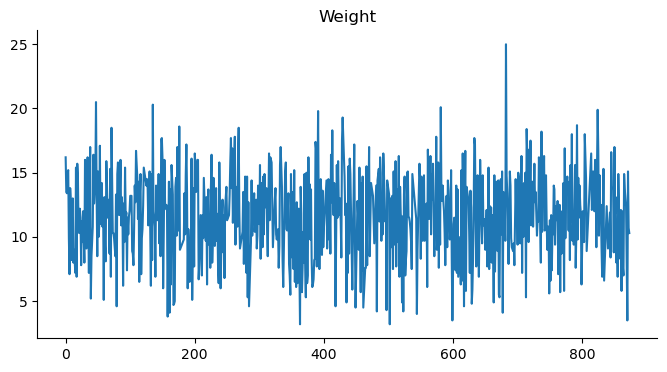

In [38]:
# Child's weight

from matplotlib import pyplot as plt
df_cleaned["Child's weight (kilograms)"].plot(kind="line", figsize=(8, 4), title="Weight")
plt.gca().spines[['top', 'right']].set_visible(False)

In [39]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [40]:
#Shape of the data
df_cleaned.shape

(768, 6)

In this dataset we have some categorical data that we will need to convert to numerical before using it to train our model.Categorical data is data that groups data points into categories e.g gender where we have female and male, whether someone smokes or no. To convert the categerocial data to numerical we will use a function called get_dummies() to convert the gender, Sex, Mother's education, Area, Wealth index quintile variables. The get_dummies function converts the variables into 0 or 1.

In [41]:
df_cleaned["Wealth index quintile"].unique()

array(['Richest', 'Second', 'Fourth', 'Poorest', 'Middle'], dtype=object)

In [42]:
df_cleaned["Sex"]=pd.get_dummies(new_data['Sex'], dtype=int,drop_first=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3128\4231030755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Sex"]=pd.get_dummies(new_data['Sex'], dtype=int,drop_first=True)


In [43]:
df_cleaned["Mother's education"]=pd.get_dummies(new_data["Mother's education"], dtype=int,drop_first=True)
df_cleaned["Area"]=pd.get_dummies(new_data["Area"], dtype=int,drop_first=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3128\3104322415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Mother's education"]=pd.get_dummies(new_data["Mother's education"], dtype=int,drop_first=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3128\3104322415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Area"]=pd.get_dummies(new_data["Area"], dtype=int,drop_first=True)


Becasue our wealth quartile dataset cointains more than two categories. We will use an encoding method to code the different categories so that we can have one column as follows

In [44]:
df_cleaned["Wealth index quintile"] = pd.factorize(df_cleaned["Wealth index quintile"])[0]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3128\957246321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Wealth index quintile"] = pd.factorize(df_cleaned["Wealth index quintile"])[0]


In [45]:
df_cleaned.head()

,Age (months),Sex,Mother's education,Area,Wealth index quintile,Child's weight (kilograms)
0,45.0,0,1,0,0,16.2
1,45.0,1,0,0,1,13.5
2,36.0,1,0,0,2,13.4
3,51.0,0,0,0,2,15.0
4,56.0,0,0,0,2,15.2


As you can see our categorical columns have been converted to numerical columns. Having converted the categorical columns into numerical columns,

Now when you look at the data, we do not have the categorical values. Our data now cointains numerical values. We can save the values to a new file for future use using the to_csv() pandas function

In [46]:
df_cleaned.to_excel("child_data.xlsx", index=False)

Once we are satisfied with how our data looks like, we can now create the values for the x and y variables. The x values in this case will cointain more that one column and the y value will contain only one column

In [47]:
#Creating the x values
x=df_cleaned.drop(columns="Child's weight (kilograms)")

In [48]:
#creating the output variable
y=df_cleaned["Child's weight (kilograms)"]

In [49]:
#Creating the model
model=linear_model.LinearRegression()

In [50]:
#spliting the data set into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [51]:
#training the model using the training data data
model.fit(x_train,y_train)

LinearRegression()

**What happens during training**

During the training the algorithm tries to find the best values of the coefficients that will lead to the best line that fits the data points. To do that, it calculates the difference between the actual value of y and the predicted value of y. This difference is usually called the **loss function**. The most commonly used loss function in regression is called the mean squared error (MSE). The mean squared error squares the difference between the predicted and the actual values of y, sums them up and then divides with the total number of the data points.

At each iteration of the algorithm tries to minimize the loss function by using an optimization algorithm. The commonly used optimization algorithm in linear regression is called **Gradient descent**. What gradient descent does at every iteration adjust the values of the coefficients so as to lower the value of the loss function. The gradient descent does this until there is no change in the loss function or the number of iteration are reached.

Once you have finished training the model, you can use it to predict the values for the test data and measure how well it does the prediction.

In [52]:
#predicting the values for the x_testing values
y_predict=model.predict(x_test)

In [53]:
y_predict.shape

(231,)

To evaluate our algorithm, we are going to use the R_squared, the adjusted R_squared and the mean_absolute error as they are the most commonly used metrics.

The adjusted r_squared: The adjusted r_squared metric adjusts the value of the r_squared based on the number of paremeters and the data size for the test.

In [54]:
from sklearn.metrics import r2_score, mean_absolute_error

#Evaluating the performance of the model
print("R_squared")
r_squa=r2_score(y_test,y_predict)
adjusted_r2 = 1 - (1 - r_squa) * (402 - 1) / (402 - 5 - 1)
print("Adjusted R", adjusted_r2)
print(r2_score(y_test,y_predict))
print("Mean absolute error")
print(mean_absolute_error(y_test,y_predict))

R_squared
Adjusted R 0.7245566924461331
0.7279911476525405
Mean absolute error
1.4365182263475926


In [23]:
import joblib
joblib_file = "linear"
joblib.dump(model, joblib_file)

['linear']

**<h3>Model evaluation results interpretation</h3>**

From the result, we can see our algorithm is working very well with an R_squared is 0.71. This means that 71 percent of the change in our outcome variable which is the expense is explained by the predictor variables. Only 27% is explained by other factors outside the predictors.

The mean **absolute error** from the model is 1.38 meaning that on avarage the difference between the predicted value and the actual value is 1.38. This means that our model predicted child's weight is 1.38 higher that the actual child's weight.

**<h3>RUGULARIZATION</h3>**

Sometimes when training the model, the model can learn very well how to map the input to the output in the training data, but fails to do a good job in mapping data that it was not trained in. This results to the model having good performance in the training data and not so good performance on the test data. This is usually reffered to as **overfitting**. In order to prevent overfitting we introduce a way of penalizing larger coefficients. This process is what is reffered to as **Regularizarion**.

There are two main types of regularization techniques

1. Lasso regularization also reffered to as L1 regularization
2. RIdge also reffered to us L2 regularization

Combining both the ridge and Lasso regularization, results to what is reffered to as **Elastic Net**

Lets look at this regularization techniques in detail

**Lasso regularization**

Lasso regularization adds a penality that is the same as the sum of absolute values of the coefficients. This penality is introduced when calculating the **loss function**.

The loss function is the function that calculates the difference between the predicted value and the actual value of y. When training our linear regression, what the algorithm does is to reduce the difference between the predicted value and the actual value of y at each iteration or pass.

By using the absolute value of the coefficients, lasso regression also helps in feature selection. This is because as we try to reduce the loss function some of the coefficients will tend towards zero hence the not so important features will not be used to determine the output variable as their value will be zero or very close to zero.

Lets train our model with Lasso regression and compare the performance with the previous model that was not using lasso

In [63]:
model_lasso=linear_model.Lasso(alpha=0.1)

In [62]:
model_lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [61]:
y_predict_lasso=model_lasso.predict(x_test)

In [60]:
from sklearn.metrics import r2_score, mean_absolute_error

#Evaluating the performance of the model
print("R_squared")
r_squa=r2_score(y_test,y_predict_lasso)
adjusted_r2 = 1 - (1 - r_squa) * (402 - 1) / (402 - 5 - 1)
print("Adjusted R", adjusted_r2)
print(r2_score(y_test,y_predict_lasso))
print("Mean absolute error")
print(mean_absolute_error(y_test,y_predict_lasso))

R_squared
Adjusted R 0.7203310164111105
0.7238181608448873
Mean absolute error
1.4487386377039464


**<h3>Ridge regression**

The difference between lasso and ridge regularization is in how the penality is applied. While laso uses the absolute values of the coefficients, ridge regression uses the square of the coefficients.

In [64]:
from sklearn.linear_model import Ridge

In [65]:
# Initialize the Ridge regression model with a specific alpha value
ridge_model = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_model.predict(x_test)

In [66]:
#Evaluating the performance of the model
print("R_squared")
r_squa=r2_score(y_test,y_pred_ridge)
adjusted_r2 = 1 - (1 - r_squa) * (402 - 1) / (402 - 5 - 1)
print("Adjusted R", adjusted_r2)
print(r2_score(y_test,y_pred_ridge))
print("Mean absolute error")
print(mean_absolute_error(y_test,y_pred_ridge))

R_squared
Adjusted R 0.7245720831528055
0.7280063464551396
Mean absolute error
1.436367668499075


In [22]:
import joblib
joblib_file = "linear_Regression3"
joblib.dump(model, joblib_file)

['linear_Regression3']

**<H2>Guided practical activity 2</h2>**
Create and evaluate a model for predicting the a child's height using the age, gender, if they live in a rural or urban area, the mothers level of education and the household wealth index.

Using the dataset called child_data.xlsx

**<h2>Classification algorithms</h2>**

As we said earlier supervised machine learning is divided into regression and classification. In classification the outcome variable is categorical while in regression, the outcome variable is numerical.
In this section we are going to look at an example of a classification algorithm called Logistic regression.

**<h3>Logistic regression</h3>**

Logistic regression is a commonly used machine learning technique for modeling binary outcomes. It’s particularly useful when the dependent variable (target) is categorical. Logistic regression is used for binary classification tasks. Unlike linear regression, which predicts continuous outcomes, logistic regression predicts the probability that a given observation belongs to a particular category or class. For example, if we want to know the probaility of someone dying from cholera based on the age, the source of drinking water, the kind of toilet they use and the area they come from either formal settlemt or not. In this case the outcome variable is either they are likely to live or they are likely to die.

We are going to demonstrate how logistic regression works using the data collected about cholera outbreak in Lamu county. As we did earlier we are going to import our libraries, load our data, create our model, train our model and test our model.

In [20]:
#importing the libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

We are going to load the data we are going to use using the pandas library read_excel() function because our data is in excel file.

In [5]:
data_cholera=pd.read_excel("cholera outbreak dataset (2).xlsx ")

In [7]:
#Displaying a few rows
data_cholera.head()

,Test_result,Test_date,Sex,Age,Subcounty,Water,Sanitation,Income,Informal_settlement,Outcome
0,0,2023-05-12,2,15,4,1,3,3,2,0
1,1,2023-05-13,2,6,2,3,3,1,1,0
2,0,2023-05-14,2,9,3,2,2,5,2,0
3,0,2023-05-15,2,10,1,4,4,5,2,0
4,0,2023-05-16,1,10,2,2,4,1,1,0


In [8]:
data_cholera.shape

(312, 10)

In [9]:
data_cholera.describe

<bound method NDFrame.describe of      Test_result  Test_date  Sex  Age  Subcounty  Water  Sanitation  Income  \
0              0 2023-05-12    2   15          4      1           3       3   
1              1 2023-05-13    2    6          2      3           3       1   
2              0 2023-05-14    2    9          3      2           2       5   
3              0 2023-05-15    2   10          1      4           4       5   
4              0 2023-05-16    1   10          2      2           4       1   
..           ...        ...  ...  ...        ...    ...         ...     ...   
307            1 2023-05-08    2   10          1      3           3       4   
308            1 2023-05-24    2    4          2      3           3       5   
309            1 2023-05-22    1    3          2      3           3       1   
310            0 2023-05-14    2    0          4      2           2       2   
311            1 2023-05-14    2    5          6      3           3       2   

     Informal_set

Our data has 10 columns. We will use the Test_result, sex, age, subcounty, water, sanitation, income and whether they live in a formal or informal setlement as our indepedent variables and the Outcome column as our depedent variable.

In [10]:
#Seperating the x and the y variables and converting them to numpy array
X=data_cholera.drop(columns=["Outcome","Test_date"])
y=data_cholera['Outcome']
X=X.to_numpy()
y=y.to_numpy()

After creating our x and y values, we will  now split the data into training and testing data

In [11]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

After splitting our data, we can now create our model

In [12]:
model=LogisticRegression()

In [13]:
#Training the model
model.fit(X_train, y_train)

LogisticRegression()

**<h2>Classification Model evaluation</h2>**

**Accuracy:** Accuracy measures the ratio of correctilly predicted observations to total observations. Accuracy is useful mainly in balanced classes.

**Precision:** Precision measurers the ratio of the true positive(No of values that were positively predicted as positive that were actually positive) and total number all the values that were predicted as positive. True Positive/(True Positive+False Positive)

**Recall:** Measurers the propotion of the actual positives that were predicted correctilly. True Positive/(True positive+False negative)

**F1 score:**
F1 Score is a metric used to evaluate a classification model. It is mostily used in binary classification where the output variable is either yes or no, or 1 and 0. It is the harmonic mean of precision and recall, providing a single metric that balances both the false positives and false negatives. As you recall from the previous class the harmonic mean is a type of average, typically used to calculate the mean of rates or ratios. It is especially useful in situations where the average of rates is desired

Now we are going to use the metrics we have discussed so that we can evaluate our logistic regression model. The classification report gives us most of the metrics for evaluating classification.




In [14]:
#Testing the model using the test data
y_pred=model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:",conf_matrix)
print("Class report:", class_report)

Accuracy: 0.9361702127659575
Confusion matrix: [[88  0]
 [ 6  0]]
Class report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97        88
           1       0.00      0.00      0.00         6

    accuracy                           0.94        94
   macro avg       0.47      0.50      0.48        94
weighted avg       0.88      0.94      0.91        94



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
import joblib
joblib_file = "logistict_Regression"
joblib.dump(model, joblib_file)

['logistict_Regression']

**<h2>Model Evaluation Interpretation</h2>**

From the classification report  we can see that precision is 1 meaning that our model indetified all the positive values as positive. This means that all the people who died from cholera were indetified to have died. Recall is indicated as 0.97 meaning that out of all the  values that were predicted to be dead 0.03 of the records were predicted to be dead when they are alive.

Our model has an accuracy of 94% meaning that it predicts correctily the outcome variable 94% of the time and the other 6% of the time it gets it wrong.

<h3>References</h3>

https://scikit-learn.org/stable/supervised_learning.html

<h2> Task </h2>

Use the data provided to create and evaluate a supervised machine learning.